In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('tested.csv')

# Preview dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Load dataset
df = pd.read_csv('tested.csv')

# Ensure columns are correct
print("Columns in dataset:", df.columns.tolist())

# Fix missing values (safe assignment)
if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].median())

if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop 'Cabin' if it exists
if 'Cabin' in df.columns:
    df = df.drop(columns='Cabin')

# Drop duplicates
df = df.drop_duplicates()

# Convert 'Survived' to category if exists
if 'Survived' in df.columns:
    df['Survived'] = df['Survived'].astype('category')

# Show cleaned data
df.info()

Columns in dataset: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Survived     418 non-null    category
 2   Pclass       418 non-null    int64   
 3   Name         418 non-null    object  
 4   Sex          418 non-null    object  
 5   Age          418 non-null    float64 
 6   SibSp        418 non-null    int64   
 7   Parch        418 non-null    int64   
 8   Ticket       418 non-null    object  
 9   Fare         417 non-null    float64 
 10  Embarked     418 non-null    object  
dtypes: category(1), float64(2), int64(4), object(4)
memory usage: 33.3+ KB


In [7]:
# Descriptive statistics
df.describe()

# Value counts
df['Survived'].value_counts()
df['Pclass'].value_counts()
df['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

Text(0.5, 1.0, 'Age Distribution')

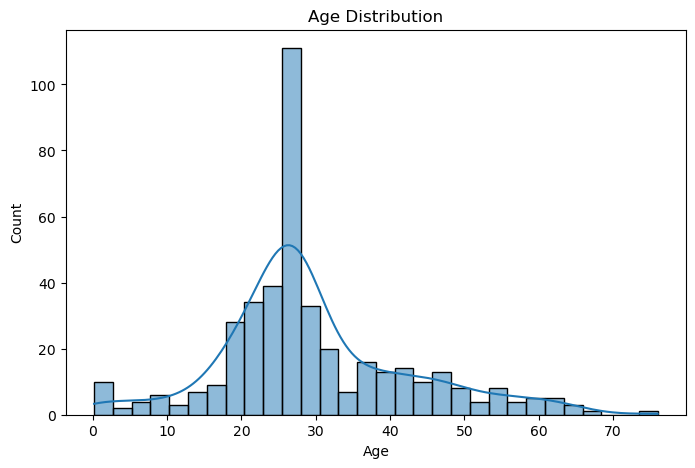

In [9]:
# Histogram of Age
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Survival Count')

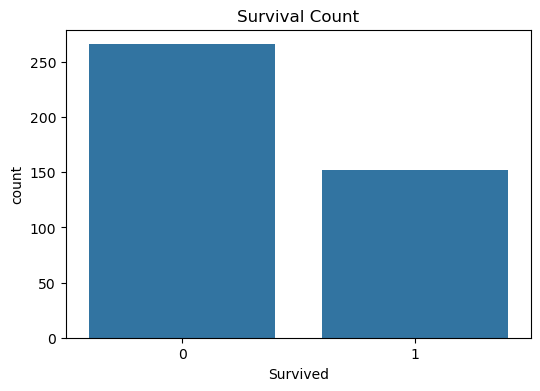

In [10]:
# Count plot of Survival
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Survived')
plt.title('Survival Count')

Text(0.5, 1.0, 'Survival Count by Sex')

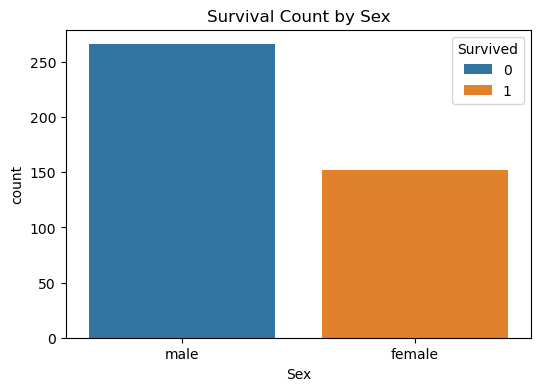

In [11]:
# Count plot by Sex
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival Count by Sex')

Text(0.5, 1.0, 'Age Distribution by Survival')

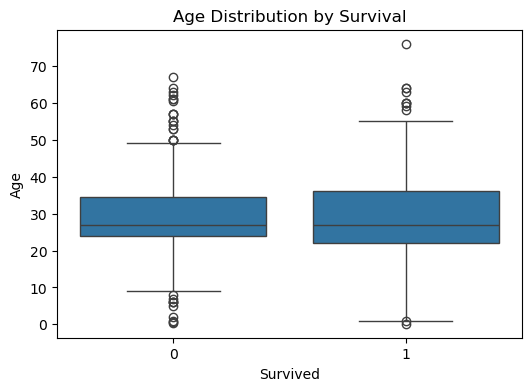

In [12]:
# Box plot of Age vs Survived
plt.figure(figsize=(6, 4))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')

Text(0.5, 1.0, 'Survival by Passenger Class')

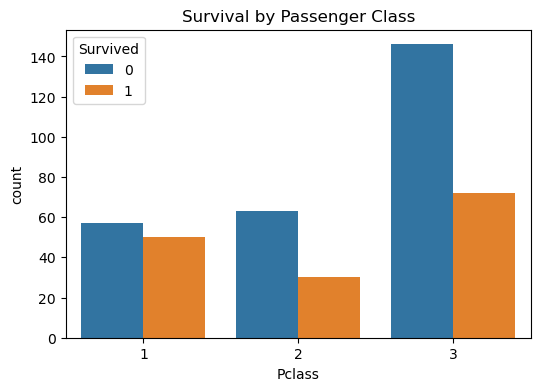

In [13]:
# Count plot of Pclass
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')

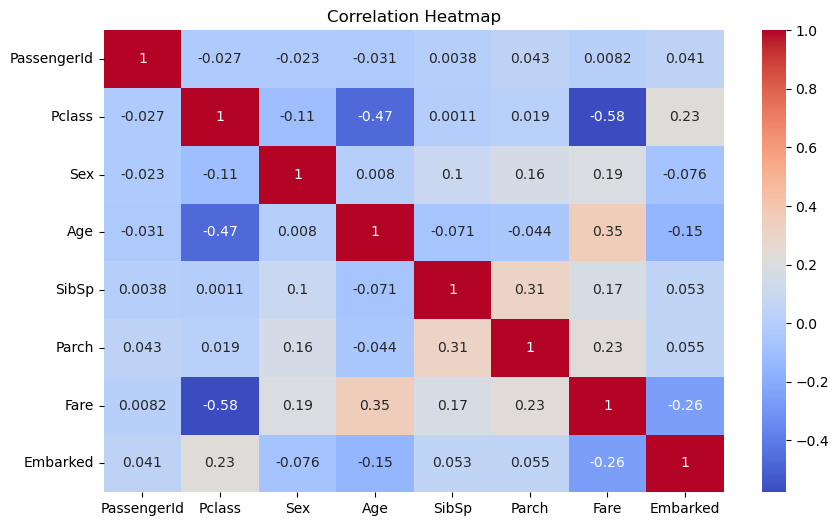

In [15]:
# Select only numeric columns for correlation
numeric_df = df_corr.select_dtypes(include=[np.number])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [18]:
# Temporarily convert 'Survived' to numeric if it's categorical
if df['Survived'].dtype.name == 'category':
    df['Survived'] = df['Survived'].astype(int)

# Groupby analysis
print("Survival rate by Sex:")
print(df.groupby('Sex')['Survived'].mean(), '\n')

print("Survival rate by Pclass:")
print(df.groupby('Pclass')['Survived'].mean(), '\n')

if 'Embarked' in df.columns:
    print("Survival rate by Embarked:")
    print(df.groupby('Embarked')['Survived'].mean())

Survival rate by Sex:
Sex
female    1.0
male      0.0
Name: Survived, dtype: float64 

Survival rate by Pclass:
Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Survived, dtype: float64 

Survival rate by Embarked:
Embarked
C    0.392157
Q    0.521739
S    0.325926
Name: Survived, dtype: float64


Text(0.5, 1.0, 'Survival by Family Size')

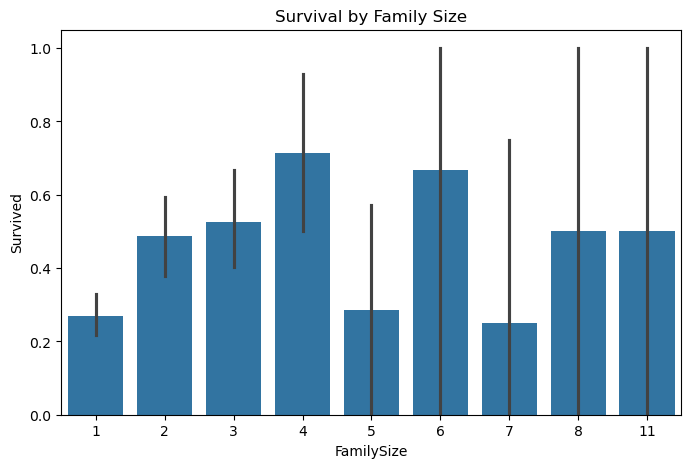

In [19]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Survival rate by Family Size
plt.figure(figsize=(8, 5))
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival by Family Size')

F:\Anaconda\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 24.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Swarm Plot of Age and Pclass by Survival')

F:\Anaconda\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 28.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


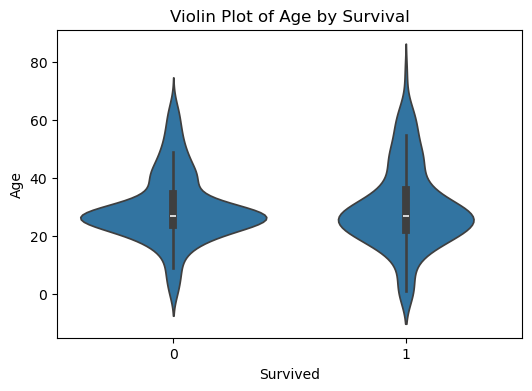

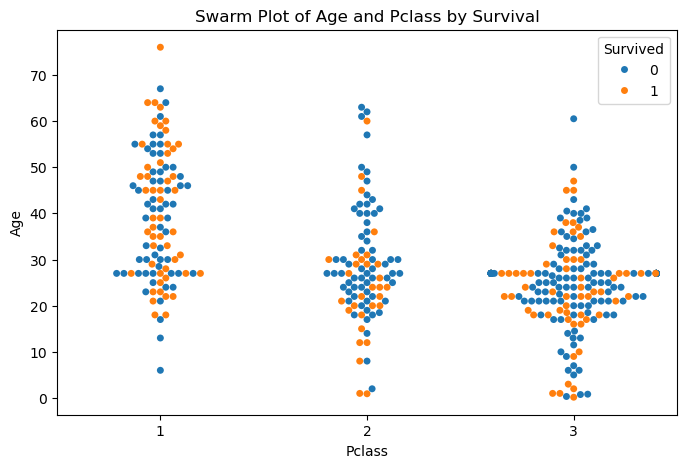

In [20]:
# Violin plot of Age vs Survived
plt.figure(figsize=(6, 4))
sns.violinplot(x='Survived', y='Age', data=df)
plt.title('Violin Plot of Age by Survival')

# Swarm plot of Age vs Pclass
plt.figure(figsize=(8, 5))
sns.swarmplot(x='Pclass', y='Age', hue='Survived', data=df)
plt.title('Swarm Plot of Age and Pclass by Survival')